# 11. Keras - введение в функциональное API

In [24]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.datasets import cifar10, mnist
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(1)

In [3]:
input = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu')(input)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(10, activation='softmax')(x)

In [4]:
model = keras.Model(inputs = input, outputs = output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 825,034 (3.15 MB)

 Trainable params: 825,034 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#стандартизация данных
x_train = x_train / 255
x_test = x_test / 255



y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3204 - loss: 1.8449 - val_accuracy: 0.4898 - val_loss: 1.4178
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5010 - loss: 1.3771 - val_accuracy: 0.5812 - val_loss: 1.1838
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5665 - loss: 1.2161 - val_accuracy: 0.6291 - val_loss: 1.0647
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6117 - loss: 1.0923 - val_accuracy: 0.6450 - val_loss: 1.0106
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6450 - loss: 1.0130 - val_accuracy: 0.6701 - val_loss: 0.9542
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6673 - loss: 0.9419 - val_accuracy: 0.6789 - val_loss: 0.9276
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6891 - loss: 0.8772 - val_accuracy: 0.6904 - val_loss: 0.8951
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.8422 - val_accuracy: 0

In [7]:
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7060 - loss: 0.9895
[1.0054492950439453, 0.7034000158309937]


In [18]:
class TfConv2d(tf.Module):
    def __init__(self, kernel=(3, 3), channels=1, strides=(2, 2), padding='SAME', activate='relu'): #параметры сверточного слоя
        super().__init__()
        self.kernel = kernel
        self.channels = channels
        self.strides = strides
        self.padding = padding
        self.activate = activate
        self.fl_init = False
        
    def __call__(self, x):
        if not self.fl_init:
            #[kernel_x, kernel_y, input_channels, output_channels]
            self.w = tf.random.truncated_normal((*self.kernel, x.shape[-1], self.channels), stddev=0.1, dtype=tf.double)
            self.b = tf.zeros([self.channels], dtype=tf.double)
            
            self.w = tf.Variable(self.w)
            self.b = tf.Variable(self.b)
            
            self.fl_init = True
            
        y = tf.nn.conv2d(x, self.w, strides=(1, *self.strides, 1), padding=self.padding) + self.b
        
        if self.activate == 'relu':
            return tf.nn.relu(y)
        elif self.activate == 'softmax':
            return tf.nn.softmax(y)
        
        return y
    

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#стандартизация данных
x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [19]:
layer1 = TfConv2d((3, 3), 32)
y = layer1(tf.expand_dims(x_test[0], axis=0))
print(y.shape)

(1, 16, 16, 32)


In [20]:
y = tf.nn.max_pool2d(y, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1), padding='SAME')
print(y.shape)

(1, 8, 8, 32)


In [21]:
#coder
enc_input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu')(enc_input)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
enc_output = layers.Dense(8,  activation='linear')(x)

encoder = keras.Model(enc_input, enc_output, name='encoder')

In [22]:
#decoder
dec_input = keras.Input(shape=(8,), name='encoding_dim')
x = layers.Dense(7 * 7 * 8, activation='relu')(dec_input)
x = keras.layers.Reshape((7, 7, 8))(x)
x = layers.Conv2DTranspose(64, 5, strides=(2, 2), activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(32, 5, strides=(2, 2), activation='linear', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
dec_output = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)

decoder = keras.Model(dec_input, dec_output, name='decoder')

In [23]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = encoder(autoencoder_input)
autoencoder_output = decoder(x)

autoencoder = keras.Model(autoencoder_input, autoencoder_output, name='autoencoder')

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#стандартизация данных
x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [26]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train, batch_size=32, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.0478


In [27]:
h = encoder.predict(tf.expand_dims(x_test[0], axis=0))
img = decoder.predict(h)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


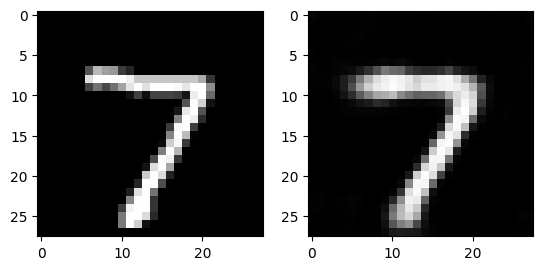

In [29]:
plt.subplot(121)
plt.imshow(x_test[0], cmap='gray')
plt.subplot(122)
plt.imshow(img.squeeze(), cmap='gray')
plt.show()